<a href="https://colab.research.google.com/github/evansemet/Jane-Street-Solutions/blob/main/2022_07_Andys_Morning_Stroll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Even though the code is relatively short for this problem, I think that it's necessary that I detail out my steps. 

The problem asked involves Markov Chains (which I had never even heard of prior to this). One thing that I've realised though after doing previous Jane Street problems involving statistics is that each part of the problem can essentially be found on math.stackexchange if you know what to search for. If you already knew what a Markov Chain was, then this was relatively straightforward to search for, but even if you didn't it just took me typing in some key phrases like "expected length of path", etc. before stumbling upon this post:

https://math.stackexchange.com/questions/691494/expected-number-of-steps-between-states-in-a-markov-chain/2322999#2322999

From there, I took a soccer ball that I made from an online cutout that I printed (I first went to some local stores to buy an actual soccer ball, but it was surprisingly hard to find one that had the standard design and didn't have some other gimmicky paralelogram pattern on it so I had to settle for paper) and then labeled each white hexagon from 0 to 19 (inclusive). 

In order to set up a matrix as described in the math.stackexchange post, I had to find the expected path length from one of the immediate surrounding points to the starting point and then add one to that to account for the initial walk to that point. It's probably important to note that if your matrix is set up correctly, the expected path length from the first visited hexagon back to the start should be the same regardless of which hexagon neighboring the starting one you pick (in my code below I actually ended up averaging the 3).

Now I knew that the expected number of walks was exactly 20 which means that we are looking for the percentage of walks on the infinite floor that are greater than 20. Finding the percentage of walks that are greater than 20 is obviously the same thing as 1 minus the percentage of walks that are less than 20 which is sustantially easier to find and can be done relatively quickly and with only a few lines of code and the help of dynamic programming.

In [ ]:
import numpy as np

Q = np.array([[   0, 1/3, 1/3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
              [ 1/3,   0,   0, 1/3,   0,   0,   0, 1/3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
              [ 1/3,   0,   0,   0, 1/3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1/3],
              [   0, 1/3,   0,   0, 1/3, 1/3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
              [   0,   0, 1/3, 1/3,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1/3,   0,   0,   0,   0,   0],
              [   0,   0,   0, 1/3,   0,   0, 1/3,   0,   0,   0,   0,   0, 1/3,   0,   0,   0,   0,   0,   0],
              [   0,   0,   0,   0,   0, 1/3,   0, 1/3,   0,   0, 1/3,   0,   0,   0,   0,   0,   0,   0,   0],
              [   0, 1/3,   0,   0,   0,   0, 1/3,   0, 1/3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
              [   0,   0,   0,   0,   0,   0,   0, 1/3,   0, 1/3,   0,   0,   0,   0,   0,   0,   0,   0,   0],
              [   0,   0,   0,   0,   0,   0,   0,   0, 1/3,   0, 1/3,   0,   0,   0,   0,   0, 1/3,   0,   0],
              [   0,   0,   0,   0,   0,   0, 1/3,   0,   0, 1/3,   0, 1/3,   0,   0,   0,   0,   0,   0,   0],
              [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1/3,   0, 1/3,   0, 1/3,   0,   0,   0,   0],
              [   0,   0,   0,   0,   0, 1/3,   0,   0,   0,   0,   0, 1/3,   0, 1/3,   0,   0,   0,   0,   0],
              [   0,   0,   0,   0, 1/3,   0,   0,   0,   0,   0,   0,   0, 1/3,   0,   0, 1/3,   0,   0,   0],
              [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1/3,   0,   0,   0, 1/3, 1/3,   0,   0],
              [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1/3, 1/3,   0,   0,   0, 1/3],
              [   0,   0,   0,   0,   0,   0,   0,   0,   0, 1/3,   0,   0,   0,   0, 1/3,   0,   0, 1/3,   0],
              [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1/3,   0, 1/3],
              [   0,   0, 1/3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1/3,   0, 1/3,   0]], dtype=float)

M = np.linalg.inv(np.identity(19) - Q)
EV = (np.sum(M[0]) + np.sum(M[17]) + np.sum(M[8])) / 3 + 1
print(f"Expected length of a stroll on the soccer ball: {EV}")

Expected length of a stroll on the soccer ball: 19.99999999999998


Even though it says that the expected length of a stroll on the soccer ball is 19.99999999999998 it's really exactly 20 because of the rounding of the 1/3s.

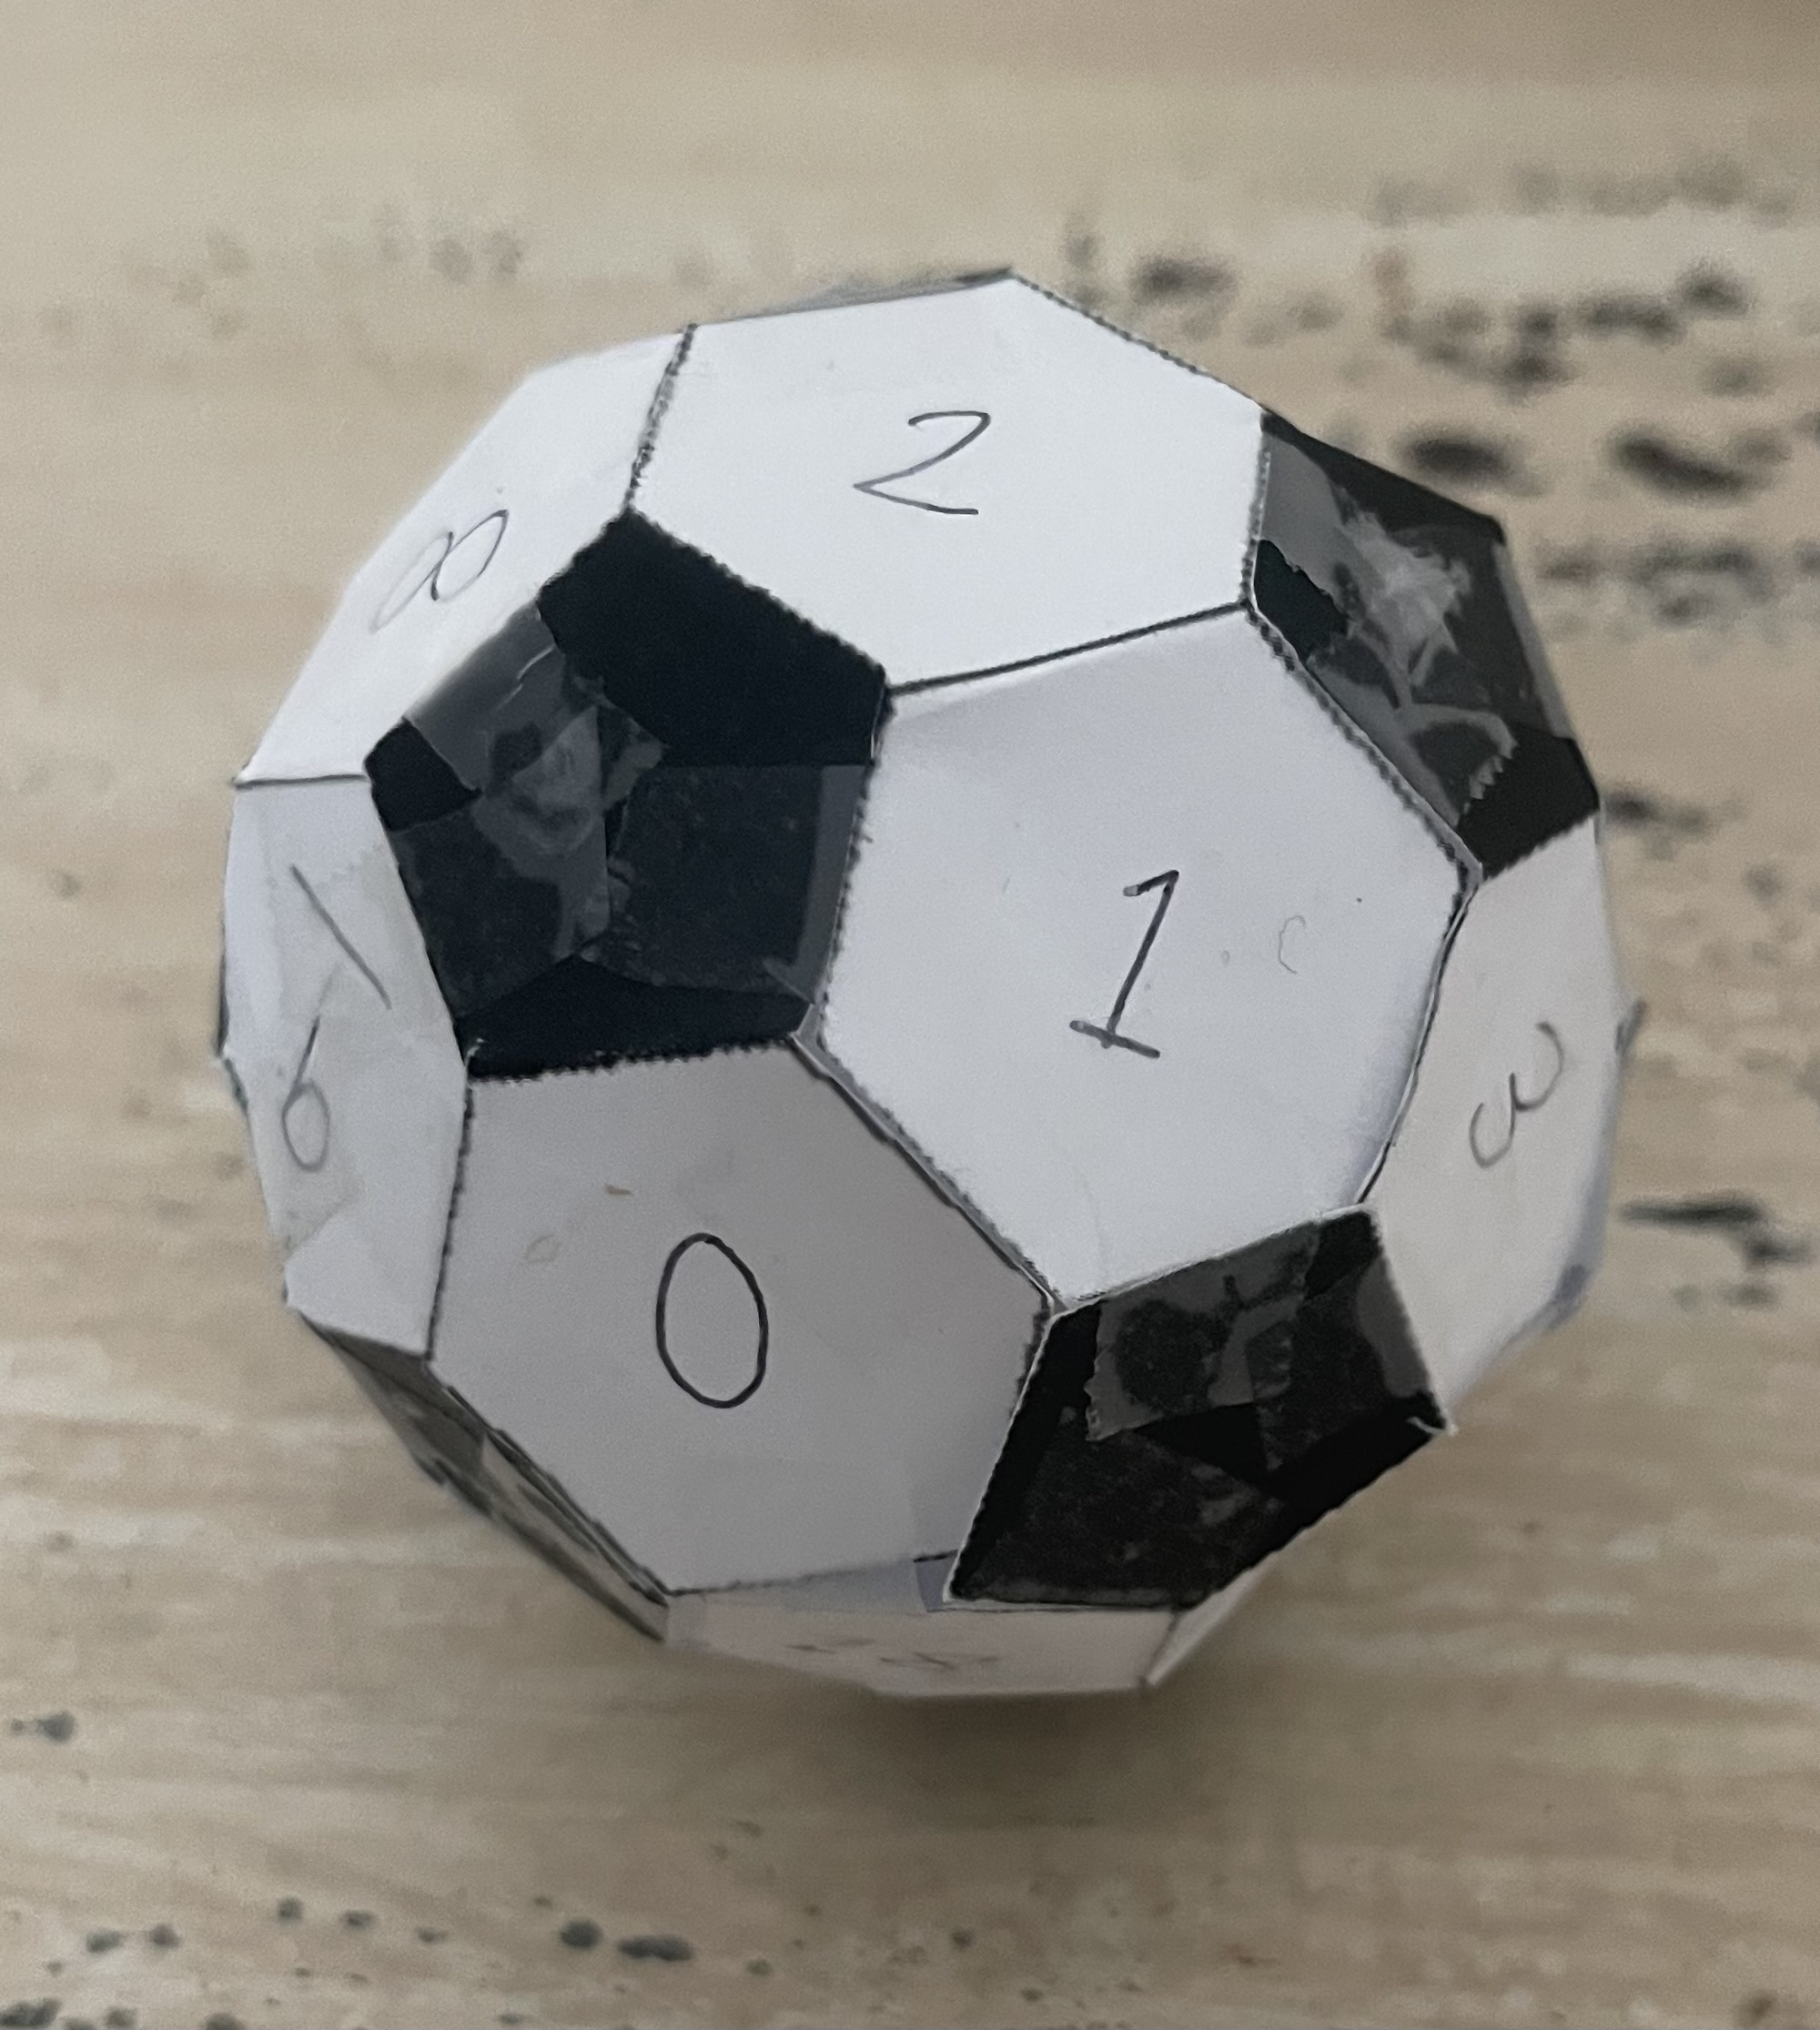

This next part I needed to make sure that my logic was correct, and since there aren't exactly test cases for this problem, I used C++ to "hard code" a solution and then wrote a more practical solution that is not only faster and more easily read, but can also be scaled for path lengths beyond 20.

The "hard code" needed to be done in C++ to not only take advantage of the higher spped, but also the fact that C++ has switch statements which further speed up the code by many magnitudes when compared to standard if statements.My cases for the switch statements will make more sense with the colored tile floor that I have.

In [ ]:
import time
start = time.time()
mapSize = 20
final = (10,10)
start_ps = (9,10)
memo = {}

def findNumPath(start, currLength, pathLength):
  if start == final and currLength <= pathLength:
    return (1/3) ** currLength
  if start == final:
    return 0
  if start[0] < 0 or start[0] > mapSize or start[1] < 0 or start[1] > mapSize:
    return 0
  if currLength > pathLength:
    return 0
  
  if start[1] % 2 == start[0] % 2:
    vertDirection = 1
  else:
    vertDirection = -1

  if (start, pathLength - currLength) not in memo:
    memo[(start, pathLength - currLength)] = findNumPath((start[0] - 1, start[1]), currLength + 1, pathLength) + \
                                             findNumPath((start[0] + 1, start[1]), currLength + 1, pathLength) + \
                                             findNumPath ((start[0], start[1] + vertDirection), currLength + 1, pathLength)

  return memo[(start, pathLength - currLength)]

# we multiply the result of our function by 3 since we only found the value for one of the 3 possible first steps
print("p = {:.7f}".format(1 - 3 * findNumPath(start_ps, 1, 20)))
print(f"Solved in {time.time() - start} seconds.")

p = 0.4480326
Solved in 0.007227182388305664 seconds.


With Some slight modification of either portions of code, we can record the number of unique path lengths of every size up to and including 20 to get an exact value of p.

$p=1-(3(\frac{1}{3})^{2}+6(\frac{1}{3})^{4}+30(\frac{1}{3})^{6}+180(\frac{1}{3})^{8}+1188(\frac{1}{3})^{10}+8322(\frac{1}{3})^{12}+60714(\frac{1}{3})^{14}+456174(\frac{1}{3})^{16}+3504630(\frac{1}{3})^{18}+27398106(\frac{1}{3})^{20})$


In [ ]:
#include <iostream>
#include <vector>
#include <cmath>
#include <iomanip>
#include <chrono>


// we want to know how far away each region is via a direct path that
// way we can stop some path cycles before they reach a length of 20
// if they still haven't returned
std::vector<int> direct() {
    std::vector<int> dir(166);
    dir[0] = 0;
    for (int i = 1; i <= 3; ++i) dir[i] = 1;
    for (int i = 4; i <= 9; ++i) dir[i] = 2;
    for (int i = 10; i <= 18; ++i) dir[i] = 3;
    for (int i = 19; i <= 30; ++i) dir[i] = 4;
    for (int i = 31; i <= 45; ++i) dir[i] = 5;
    for (int i = 46; i <= 63; ++i) dir[i] = 6;
    for (int i = 64; i <= 84; ++i) dir[i] = 7;
    for (int i = 85; i <= 108; ++i) dir[i] = 8;
    for (int i = 109; i <= 135; ++i) dir[i] = 9;
    for (int i = 136; i <= 165; ++i) dir[i] = 10;
    return dir;
}


std::vector<int> dir = direct();


// reg stands for region and p stands for the path length
// we are using switch statements instead of if, else ifs in
// order to speed up the code so that it does not need to check
// through every if statement prior to the one that executes
long double tile(int reg, int p) {
    // so that we can cut off paths that don't have a chance at being <= 20 off
    if (p + dir[reg] > 20) return 0;
    // if we have a valid path length
    if (reg == 0) return pow(1.0/3.0, p);
    ++p;
    switch (reg) {
        case 1:
            return tile(0, p) + tile(4, p) + tile(9, p);
        case 2:
            return tile(0, p) + tile(5, p) + tile(6, p);
        case 3:
            return tile(0, p) + tile(7, p) + tile(8, p);
        case 4:
            return tile(1, p) + tile(10, p) + tile(11, p);
        case 5:
            return tile(2, p) + tile(11, p) + tile(12, p);
        case 6:
            return tile(2, p) + tile(13, p) + tile(14, p);
        case 7:
            return tile(3, p) + tile(14, p) + tile(15, p);
        case 8:
            return tile(3, p) + tile(16, p) + tile(17, p);
        case 9:
            return tile(1, p) + tile(17, p) + tile(18, p);
        case 10:
            return tile(4, p) + tile(19, p) + tile(20, p);
        case 11:
            return tile(4, p) + tile(5, p) + tile(21, p);
        case 12:
            return tile(5, p) + tile(22, p) + tile(23, p);
        case 13:
            return tile(6, p) + tile(23, p) + tile(24, p);
        case 14:
            return tile(6, p) + tile(7, p) + tile(25, p);
        case 15:
            return tile(7, p) + tile(26, p) + tile(27, p);
        case 16:
            return tile(8, p) + tile(27, p) + tile(28, p);
        case 17:
            return tile(8, p) + tile(9, p) + tile(29, p);
        case 18:
            return tile(9, p) + tile(19, p) + tile(30, p);
        case 19:
            return tile(10, p) + tile(18, p) + tile(31, p);
        case 20:
            return tile(10, p) + tile(32, p) + tile(33, p);
        case 21:
            return tile(11, p) + tile(33, p) + tile(34, p);
        case 22:
            return tile(12, p) + tile(34, p) + tile(35, p);
        case 23:
            return tile(12, p) + tile(13, p) + tile(36, p);
        case 24:
            return tile(13, p) + tile(37, p) + tile(38, p);
        case 25:
            return tile(14, p) + tile(38, p) + tile(39, p);
        case 26:
            return tile(15, p) + tile(39, p) + tile(40, p);
        case 27:
            return tile(15, p) + tile(16, p) + tile(41, p);
        case 28:
            return tile(16, p) + tile(42, p) + tile(43, p);
        case 29:
            return tile(17, p) + tile(43, p) + tile(44, p);
        case 30:
            return tile(18, p) + tile(44, p) + tile(45, p);
        case 31:
            return tile(19, p) + tile(46, p) + tile(63, p);
        case 32:
            return tile(20, p) + tile(46, p) + tile(47, p);
        case 33:
            return tile(20, p) + tile(21, p) + tile(48, p);
        case 34:
            return tile(21, p) + tile(22, p) + tile(49, p);
        case 35:
            return tile(22, p) + tile(50, p) + tile(51, p);
        case 36:
            return tile(23, p) + tile(51, p) + tile(52, p);
        case 37:
            return tile(24, p) + tile(52, p) + tile(53, p);
        case 38:
            return tile(24, p) + tile(25, p) + tile(54, p);
        case 39:
            return tile(25, p) + tile(26, p) + tile(55, p);
        case 40:
            return tile(26, p) + tile(56, p) + tile(57, p);
        case 41:
            return tile(27, p) + tile(57, p) + tile(58, p);
        case 42:
            return tile(28, p) + tile(58, p) + tile(59, p);
        case 43:
            return tile(28, p) + tile(29, p) + tile(60, p);
        case 44:
            return tile(29, p) + tile(30, p) + tile(61, p);
        case 45:
            return tile(30, p) + tile(62, p) + tile(63, p);
        case 46:
            return tile(31, p) + tile(32, p) + tile(64, p);
        case 47:
            return tile(32, p) + tile(65, p) + tile(66, p);
        case 48:
            return tile(33, p) + tile(66, p) + tile(67, p);
        case 49:
            return tile(34, p) + tile(67, p) + tile(68, p);
        case 50:
            return tile(35, p) + tile(68, p) + tile(69, p);
        case 51:
            return tile(35, p) + tile(36, p) + tile(70, p);
        case 52:
            return tile(36, p) + tile(37, p) + tile(71, p);
        case 53:
            return tile(37, p) + tile(72, p) + tile(73, p);
        case 54:
            return tile(38, p) + tile(73, p) + tile(74, p);
        case 55:
            return tile(39, p) + tile(74, p) + tile(75, p);
        case 56:
            return tile(40, p) + tile(75, p) + tile(76, p);
        case 57:
            return tile(40, p) + tile(41, p) + tile(77, p);
        case 58:
            return tile(41, p) + tile(42, p) + tile(78, p);
        case 59:
            return tile(42, p) + tile(79, p) + tile(80, p);
        case 60:
            return tile(43, p) + tile(80, p) + tile(81, p);
        case 61:
            return tile(44, p) + tile(81, p) + tile(82, p);
        case 62:
            return tile(45, p) + tile(82, p) + tile(83, p);
        case 63:
            return tile(31, p) + tile(45, p) + tile(84, p);
        case 64:
            return tile(46, p) + tile(85, p) + tile(86, p);
        case 65:
            return tile(47, p) + tile(86, p) + tile(87, p);
        case 66:
            return tile(47, p) + tile(48, p) + tile(88, p);
        case 67:
            return tile(48, p) + tile(49, p) + tile(89, p);
        case 68:
            return tile(49, p) + tile(50, p) + tile(90, p);
        case 69:
            return tile(50, p) + tile(91, p) + tile(92, p);
        case 70:
            return tile(51, p) + tile(92, p) + tile(93, p);
        case 71:
            return tile(52, p) + tile(93, p) + tile(94, p);
        case 72:
            return tile(53, p) + tile(94, p) + tile(95, p);
        case 73:
            return tile(53, p) + tile(54, p) + tile(96, p);
        case 74:
            return tile(54, p) + tile(55, p) + tile(97, p);
        case 75:
            return tile(55, p) + tile(56, p) + tile(98, p);
        case 76:
            return tile(56, p) + tile(99, p) + tile(100, p);
        case 77:
            return tile(57, p) + tile(100, p) + tile(101, p);
        case 78:
            return tile(58, p) + tile(101, p) + tile(102, p);
        case 79:
            return tile(59, p) + tile(102, p) + tile(103, p);
        case 80:
            return tile(59, p) + tile(60, p) + tile(104, p);
        case 81:
            return tile(60, p) + tile(61, p) + tile(105, p);
        case 82:
            return tile(61, p) + tile(62, p) + tile(106, p);
        case 83:
            return tile(62, p) + tile(107, p) + tile(108, p);
        case 84:
            return tile(63, p) + tile(85, p) + tile(108, p);
        case 85:
            return tile(64, p) + tile(84, p) + tile(109, p);
        case 86:
            return tile(64, p) + tile(65, p) + tile(110, p);
        case 87:
            return tile(65, p) + tile(111, p) + tile(112, p);
        case 88:
            return tile(66, p) + tile(112, p) + tile(113, p);
        case 89:
            return tile(67, p) + tile(113, p) + tile(114, p);
        case 90:
            return tile(68, p) + tile(114, p) + tile(115, p);
        case 91:
            return tile(69, p) + tile(115, p) + tile(116, p);
        case 92:
            return tile(69, p) + tile(70, p) + tile(117, p);
        case 93:
            return tile(70, p) + tile(71, p) + tile(118, p);
        case 94:
            return tile(71, p) + tile(72, p) + tile(119, p);
        case 95:
            return tile(72, p) + tile(120, p) + tile(121, p);
        case 96:
            return tile(73, p) + tile(121, p) + tile(122, p);
        case 97:
            return tile(74, p) + tile(122, p) + tile(123, p);
        case 98:
            return tile(75, p) + tile(123, p) + tile(124, p);
        case 99:
            return tile(76, p) + tile(124, p) + tile(125, p);
        case 100:
            return tile(76, p) + tile(77, p) + tile(126, p);
        case 101:
            return tile(77, p) + tile(78, p) + tile(127, p);
        case 102:
            return tile(78, p) + tile(79, p) + tile(128, p);
        case 103:
            return tile(79, p) + tile(129, p) + tile(130, p);
        case 104:
            return tile(80, p) + tile(130, p) + tile(131, p);
        case 105:
            return tile(81, p) + tile(131, p) + tile(132, p);
        case 106:
            return tile(82, p) + tile(132, p) + tile(133, p);
        case 107:
            return tile(83, p) + tile(133, p) + tile(134, p);
        case 108:
            return tile(83, p) + tile(84, p) + tile(135, p);
        case 109:
            return tile(85, p) + tile(136, p) + tile(165, p);
        case 110:
            return tile(86, p) + tile(136, p) + tile(137, p);
        case 111:
            return tile(87, p) + tile(137, p) + tile(138, p);
        case 112:
            return tile(87, p) + tile(88, p) + tile(139, p);
        case 113:
            return tile(88, p) + tile(89, p) + tile(140, p);
        case 114:
            return tile(89, p) + tile(90, p) + tile(141, p);
        case 115:
            return tile(90, p) + tile(91, p) + tile(142, p);
        case 116:
            return tile(91, p) + tile(143, p) + tile(144, p);
        case 117:
            return tile(92, p) + tile(144, p) + tile(145, p);
        case 118:
            return tile(93, p) + tile(145, p) + tile(146, p);
        case 119:
            return tile(94, p) + tile(146, p) + tile(147, p);
        case 120:
            return tile(95, p) + tile(147, p) + tile(148, p);
        case 121:
            return tile(95, p) + tile(96, p) + tile(149, p);
        case 122:
            return tile(96, p) + tile(97, p) + tile(150, p);
        case 123:
            return tile(97, p) + tile(98, p) + tile(151, p);
        case 124:
            return tile(98, p) + tile(99, p) + tile(152, p);
        case 125:
            return tile(99, p) + tile(153, p) + tile(154, p);
        case 126:
            return tile(100, p) + tile(154, p) + tile(155, p);
        case 127:
            return tile(101, p) + tile(155, p) + tile(156, p);
        case 128:
            return tile(102, p) + tile(156, p) + tile(157, p);
        case 129:
            return tile(103, p) + tile(157, p) + tile(158, p);
        case 130:
            return tile(103, p) + tile(104, p) + tile(159, p);
        case 131:
            return tile(104, p) + tile(105, p) + tile(160, p);
        case 132:
            return tile(105, p) + tile(106, p) + tile(161, p);
        case 133:
            return tile(106, p) + tile(107, p) + tile(162, p);
        case 134:
            return tile(107, p) + tile(163, p) + tile(164, p);
        case 135:
            return tile(108, p) + tile(164, p) + tile(165, p);
        case 136:
            return tile(109, p) + tile(110, p);
        case 137:
            return tile(110, p) + tile(111, p);
        case 138:
            return tile(111, p);
        case 139:
            return tile(112, p);
        case 140:
            return tile(113, p);
        case 141:
            return tile(114, p);
        case 142:
            return tile(115, p);
        case 143:
            return tile(116, p);
        case 144:
            return tile(116, p) + tile(117, p);
        case 145:
            return tile(117, p) + tile(118, p);
        case 146:
            return tile(118, p) + tile(119, p);
        case 147:
            return tile(119, p) + tile(120, p);
        case 148:
            return tile(120, p);
        case 149:
            return tile(121, p);
        case 150:
            return tile(122, p);
        case 151:
            return tile(123, p);
        case 152:
            return tile(124, p);
        case 153:
            return tile(125, p);
        case 154:
            return tile(125, p) + tile(126, p);
        case 155:
            return tile(126, p) + tile(127, p);
        case 156:
            return tile(127, p) + tile(128, p);
        case 157:
            return tile(128, p) + tile(129, p);
        case 158:
            return tile(129, p);
        case 159:
            return tile(130, p);
        case 160:
            return tile(131, p);
        case 161:
            return tile(132, p);
        case 162:
            return tile(133, p);
        case 163:
            return tile(134, p);
        case 164:
            return tile(134, p) + tile(135, p);
        case 165:
            return tile(109, p) + tile(135, p);
    }
}


int main()
{
    std::cout << "Solving...\n";
    auto start = std::chrono::high_resolution_clock::now();
    std::cout << std::setprecision(7) << "p = " <<1 - (tile(1, 1) + tile(2,1) + tile(3,1)) << "\n";
    auto stop = std::chrono::high_resolution_clock::now();
    auto duration = duration_cast<std::chrono::milliseconds>(stop - start);
    std::cout << "Solved in " << duration.count() << " milliseconds.\n\n";
    return 0;
}

Solving...

p = 0.4480326

Solved in 2439 milliseconds.

Process finished with exit code 0

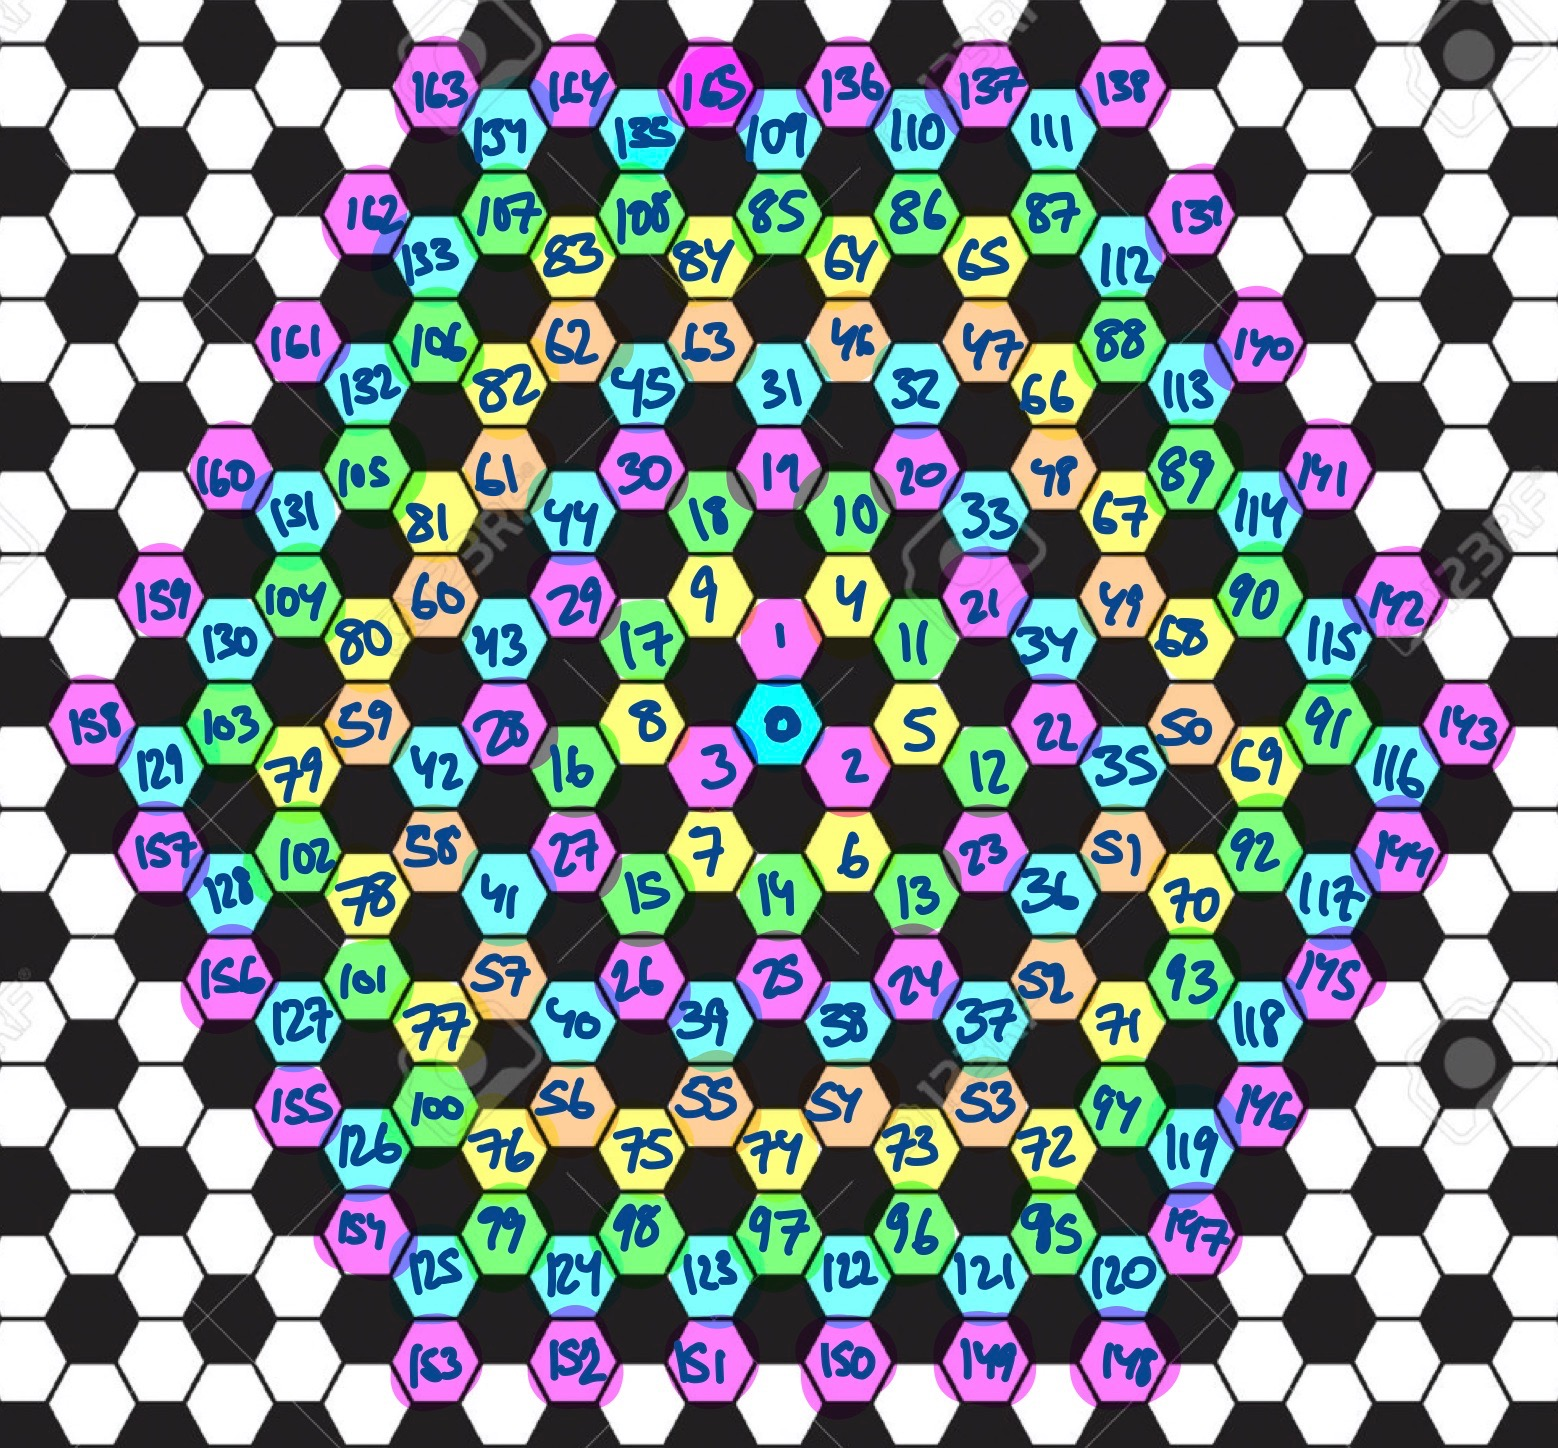